In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_soil_data.csv')
print(df.head())


  crop_type  soil_moisture  temperature  rainfall  humidity  irrigate
0    Cotton          44.29        22.05    136.07     74.18         0
1      Rice          39.50        38.87    269.40     67.04         0
2     Wheat          23.29        39.08      5.37     50.58         1
3      Rice          40.22        15.13    249.07     68.14         1
4    Cotton          25.46        23.09    200.94     59.02         1


In [3]:
# Separate features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']


KeyError: "['Label'] not found in axis"

In [4]:
print(df.columns)

Index(['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity',
       'irrigate'],
      dtype='object')


In [5]:
# Clean column names
df.columns = df.columns.str.strip()  # remove leading/trailing spaces
print(df.columns)  # check again


Index(['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity',
       'irrigate'],
      dtype='object')


In [7]:
print(df.columns.tolist())


['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity', 'irrigate']


In [8]:
X = df.drop('irrigate', axis=1)
y = df['irrigate']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid SettingWithCopyWarning
X_cleaned = X.copy()

# Encode all object-type columns in X
for col in X_cleaned.columns:
    if X_cleaned[col].dtype == 'object':
        X_cleaned[col] = LabelEncoder().fit_transform(X_cleaned[col])

# Check for success
print(X_cleaned.dtypes)


crop_type          int64
soil_moisture    float64
temperature      float64
rainfall         float64
humidity         float64
dtype: object


In [15]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('YieldResults.csv')

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# Clean column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # print cleaned column names

# Split features and target
X = df.drop('pump', axis=1)
y = df['pump']

# Make a copy of features to encode
X_cleaned = X.copy()

# Encode all object-type columns in X
for col in X_cleaned.columns:
    if X_cleaned[col].dtype == 'object':
        X_cleaned[col] = LabelEncoder().fit_transform(X_cleaned[col])

# If y is a string label, encode it too
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Check that all features are now numeric
print(X_cleaned.dtypes)


   soil_moisture  temperature crop_type  Irrigate
0      46.119353     9.884229      Rice       1.0
1      37.542525    13.967073      Rice       1.0
2      24.926279    13.590147      Rice       1.0
3      24.114157    12.343355      Rice       1.0
4      27.420927    11.007707      Rice       1.0
Index(['soil_moisture', 'temperature', 'crop_type', 'Irrigate'], dtype='object')
['soil_moisture', 'temperature', 'crop_type', 'Irrigate']


KeyError: "['pump'] not found in axis"

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        31

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 9  0]
 [ 0 31]]


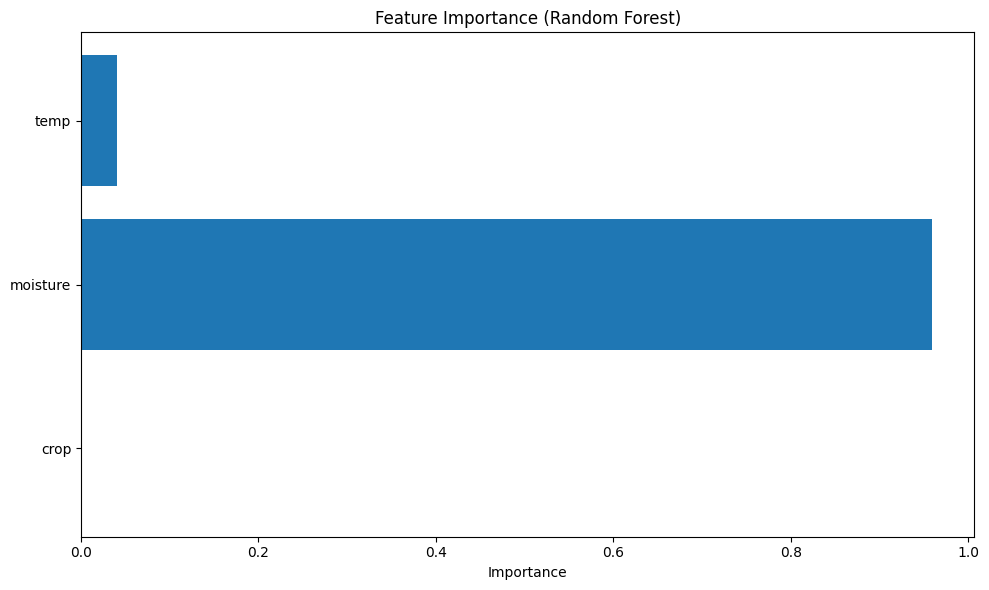

In [6]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_cleaned.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# ====== 1. Load dataset ======
df = pd.read_csv("YieldResults.csv")  # replace with your file path

# ====== 2. Handle missing values ======
for col in df.columns:
    if col == 'Irrigate':  # Target column
        df[col] = df[col].fillna(df[col].mode()[0])  # Replace NaN with mode
    elif df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].mean())  # Numeric → mean
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # Categorical → mode

# ====== 3. Separate features (X) and target (y) ======
X = df.drop('Irrigate', axis=1)
y = df['Irrigate'].astype(int)  # Ensure target is discrete integers  

# ====== 4. One-hot encode categorical features ======
X_encoded = pd.get_dummies(X, drop_first=True)

# ====== 5. Balance classes with SMOTE ======
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y)

# ====== 6. Train/Test split ======
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# ====== 7. Train Random Forest ======
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ====== 8. Predictions ======
y_pred = model.predict(X_test)

# ====== 9. Evaluation ======
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7346938775510204

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.74       235
           1       0.77      0.70      0.73       255

    accuracy                           0.73       490
   macro avg       0.74      0.74      0.73       490
weighted avg       0.74      0.73      0.73       490


Confusion Matrix:
 [[182  53]
 [ 77 178]]


In [16]:
feature_names = X_encoded.columns
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)



         Feature  Importance
0  soil_moisture    0.338843
1    temperature    0.335129
2     humidity_%    0.326029


In [13]:
pip install paho-mqtt


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import joblib
import json
import paho.mqtt.client as mqtt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Example: train your encoder
encoder = StandardScaler()
X_encoded = encoder.fit_transform(X)  # X is your feature matrix

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)  # y is your target (0 or 1 for irrigation)

# Save both the model and encoder
joblib.dump(model, "irrigation_model.pkl")
joblib.dump(encoder, "feature_encoder.pkl")

print("Random Forest model and encoder saved successfully!")


# Load trained model and encoder
model = joblib.load("irrigation_model.pkl")
encoder = joblib.load("feature_encoder.pkl")

# MQTT settings
BROKER = "broker.hivemq.com"  # Change to your MQTT broker IP or hostname
PORT = 1883
TOPIC = "farm/sensors"        # Change to your topic

def on_message(client, userdata, msg):
    try:
        # Decode message (assuming JSON format from microcontroller)
        payload = json.loads(msg.payload.decode())
        
        # Extract sensor data
        temp = float(payload["Temperature"])
        soil = float(payload["SoilMoisture"])
        humidity = float(payload["Humidity"])
        rain = float(payload["Rainfall"])
        
        # Create DataFrame
        sensor_df = pd.DataFrame([{
            'Temperature': temp,
            'SoilMoisture': soil,
            'Humidity': humidity,
            'Rainfall': rain
        }])
        
        # Transform features and predict
        sensor_encoded = encoder.transform(sensor_df)
        prediction = model.predict(sensor_encoded)[0]
        
        # Show decision
        status = "Irrigate " if prediction == 1 else "Do NOT Irrigate ❌"
        print(f"[Sensor Data] Temp={temp}°C | Soil={soil}% | Humidity={humidity}% | Rain={rain}mm → {status}")
    
    except Exception as e:
        print("Error processing message:", e)

# MQTT setup
client = mqtt.Client()
client.on_message = on_message

client.connect(BROKER, PORT, 60)
client.subscribe(TOPIC)

print(f"Listening for sensor data on topic '{TOPIC}'...")
client.loop_forever()


ValueError: could not convert string to float: 'Rice'